<a href="https://colab.research.google.com/github/sumanabiswas001/machine-learning-projects/blob/main/Building_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


#Normalize data

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#Reshape Data

In [4]:
train_images = train_images.reshape((train_images.shape[0], 32, 32, 3))
test_images = test_images.reshape((test_images.shape[0], 32, 32, 3))

One-Hot Encode Label

In [5]:
train_labels_one_hot = keras.utils.to_categorical(train_labels, num_classes=100)
test_labels_one_hot = keras.utils.to_categorical(test_labels, num_classes=100)

# Verify dataset Shapes

In [6]:
print("Training images shape:", train_images.shape)
print("Testing images shape:", test_images.shape)
print("Training labels shape:", train_labels_one_hot.shape)
print("Testing labels shape:", test_labels_one_hot.shape)

Training images shape: (50000, 32, 32, 3)
Testing images shape: (10000, 32, 32, 3)
Training labels shape: (50000, 100)
Testing labels shape: (10000, 100)


# ANN Model

In [7]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(100, activation='softmax') # Changed output layer to 100 for CIFAR-100
])

ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 408,100 (1.56 MB)

 Trainable params: 408,100 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

# Basic CNN MOdel

In [8]:
basic_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), # Changed input_shape to match CIFAR-100
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(100, activation='softmax') # Changed output layer to 100 for CIFAR-100
])


basic_cnn_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

basic_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,412 (677.39 KB)

 Trainable params: 173,412 (677.39 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
deeper_cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), # Changed input_shape to match CIFAR-100
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(100, activation='softmax') # Changed output layer to 100 for CIFAR-100
])

deeper_cnn_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

deeper_cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,220 (676.64 KB)

 Trainable params: 172,516 (673.89 KB)

 Non-trainable params: 704 (2.75 KB)

# Training ANN Model

In [10]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_ann = keras.callbacks.ModelCheckpoint(
    filepath='best_ann_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training ANN model...")
ann_history = ann_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_ann]
)
print("ANN model training finished.")

Training ANN model...
Epoch 1/30
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0395 - loss: 4.3982
Epoch 1: val_loss improved from inf to 3.92719, saving model to best_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.0397 - loss: 4.3961 - val_accuracy: 0.0978 - val_loss: 3.9272
Epoch 2/30
776/782 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1085 - loss: 3.8596
Epoch 2: val_loss improved from 3.92719 to 3.74515, saving model to best_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1086 - loss: 3.8591 - val_accuracy: 0.1336 - val_loss: 3.7452
Epoch 3/30
780/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1410 - loss: 3.6733
Epoch 3: val_loss improved from 3.74515 to 3.64203, saving model to best_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1410 - loss: 3.6732 - val_accuracy: 0.1550 - val_loss: 3.6420
Epoch 4/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.

In [11]:
model_checkpoint_basic_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_basic_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Basic CNN model...")
basic_cnn_history = basic_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_basic_cnn]
)
print("Basic CNN model training finished.")

Training Basic CNN model...
Epoch 1/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0608 - loss: 4.2081
Epoch 1: val_loss improved from inf to 3.50477, saving model to best_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.0609 - loss: 4.2074 - val_accuracy: 0.1735 - val_loss: 3.5048
Epoch 2/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2009 - loss: 3.3352
Epoch 2: val_loss improved from 3.50477 to 3.08687, saving model to best_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.2009 - loss: 3.3350 - val_accuracy: 0.2494 - val_loss: 3.0869
Epoch 3/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2658 - loss: 2.9961
Epoch 3: val_loss improved from 3.08687 to 2.97807, saving model to best_basic_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.2658 - loss: 2.9960 - val_accuracy: 0.2676 - val_loss: 2.9781
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━

In [12]:
model_checkpoint_deeper_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_deeper_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training Deeper CNN model...")
deeper_cnn_history = deeper_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_deeper_cnn]
)
print("Deeper CNN model training finished.")

Training Deeper CNN model...
Epoch 1/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.0549 - loss: 4.5980
Epoch 1: val_loss improved from inf to 3.82375, saving model to best_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 79ms/step - accuracy: 0.0550 - loss: 4.5970 - val_accuracy: 0.1207 - val_loss: 3.8237
Epoch 2/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.1538 - loss: 3.5828
Epoch 2: val_loss improved from 3.82375 to 3.21851, saving model to best_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.1538 - loss: 3.5826 - val_accuracy: 0.2276 - val_loss: 3.2185
Epoch 3/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.2061 - loss: 3.2704
Epoch 3: val_loss did not improve from 3.21851
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.2061 - loss: 3.2703 - val_accuracy: 0.1919 - val_loss: 3.5604
Epoch 4/30
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.2376 - loss: 3.0975
Epoch

/tmp/ipython-input-2215778233.py:42: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


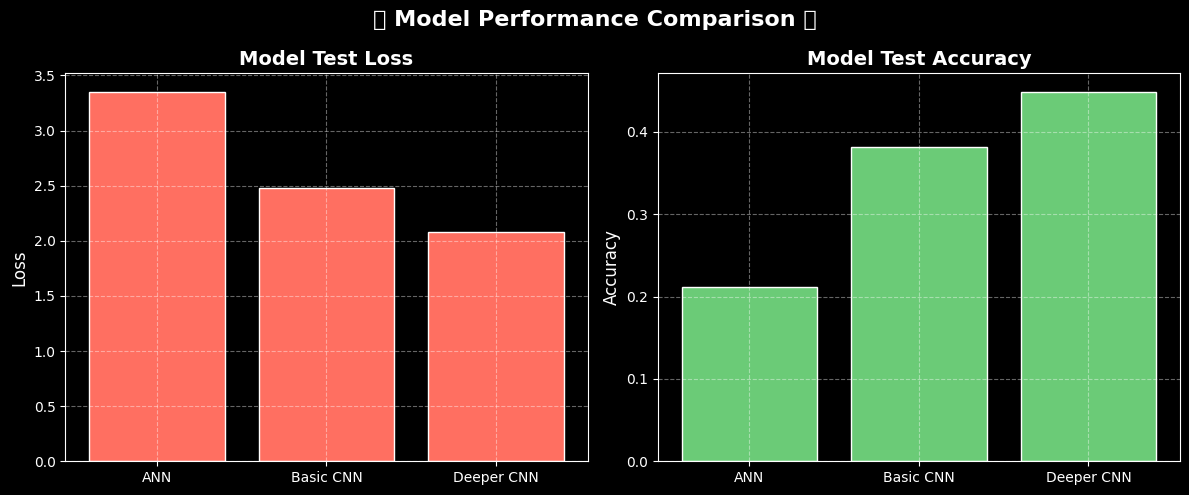

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

ann_model.load_weights('best_ann_model_weights.weights.h5')
basic_cnn_model.load_weights('best_basic_cnn_model_weights.weights.h5')
deeper_cnn_model.load_weights('best_deeper_cnn_model_weights.weights.h5')

loss_ann, accuracy_ann = ann_model.evaluate(test_images, test_labels_one_hot, verbose=0)
loss_basic_cnn, accuracy_basic_cnn = basic_cnn_model.evaluate(test_images, test_labels_one_hot, verbose=0)
loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn_model.evaluate(test_images, test_labels_one_hot, verbose=0)


import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['ANN', 'Basic CNN', 'Deeper CNN']
losses = [loss_ann, loss_basic_cnn, loss_deeper_cnn]
accuracies = [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]

# Dark mode style
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


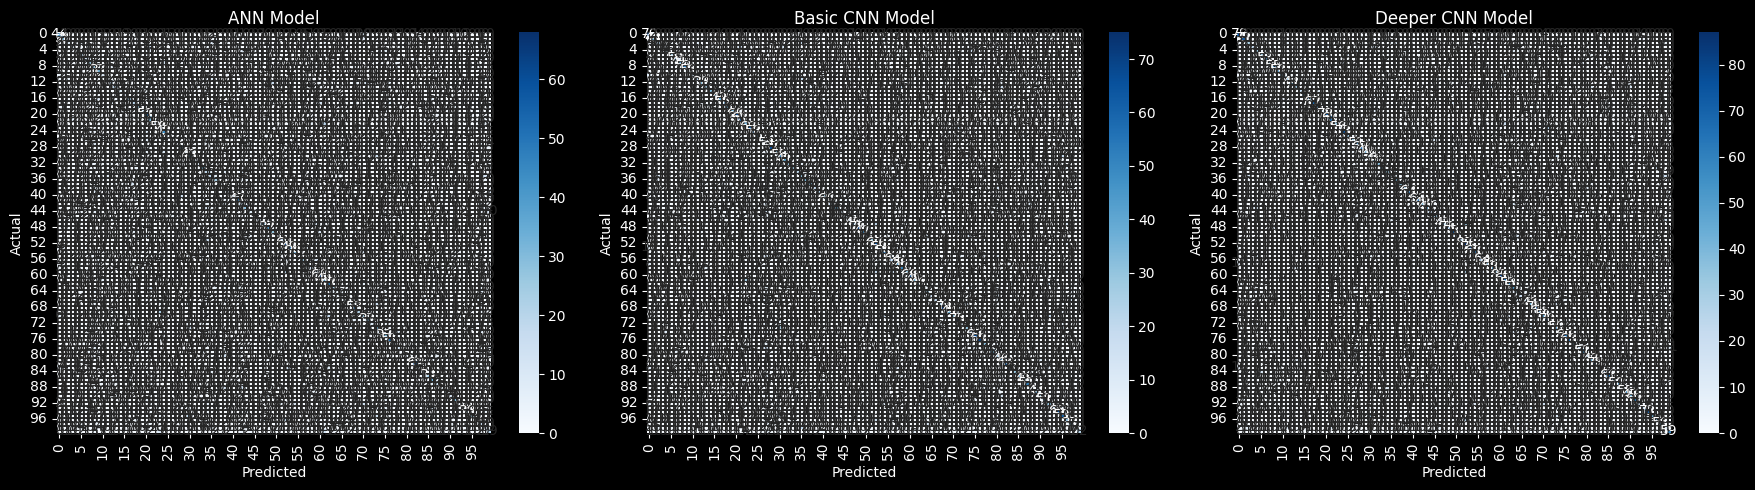

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
ann_predictions = ann_model.predict(test_images)
basic_cnn_predictions = basic_cnn_model.predict(test_images)
deeper_cnn_predictions = deeper_cnn_model.predict(test_images)

# Convert labels
test_labels_int = np.argmax(test_labels_one_hot, axis=1)

ann_predicted_labels = np.argmax(ann_predictions, axis=1)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)
deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

# Confusion matrices
cm_ann = confusion_matrix(test_labels_int, ann_predicted_labels)
cm_basic = confusion_matrix(test_labels_int, basic_cnn_predicted_labels)
cm_deeper = confusion_matrix(test_labels_int, deeper_cnn_predicted_labels)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("ANN Model")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_basic, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("Basic CNN Model")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_deeper, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title("Deeper CNN Model")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [15]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

models = {
    "ANN": ("cyan", ann_history),
    "Basic CNN": ("magenta", basic_cnn_history),
    "Deeper CNN": ("yellow", deeper_cnn_history)
}

performance_data = {
    'Model': ['ANN', 'Basic CNN', 'Deeper CNN'],
    'Test Loss': [loss_ann, loss_basic_cnn, loss_deeper_cnn],
    'Test Accuracy': [accuracy_ann, accuracy_basic_cnn, accuracy_deeper_cnn]
}

performance_df = pd.DataFrame(performance_data)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

for name, (color, history) in models.items():
    # Accuracy
    fig.add_trace(go.Scatter(y=history.history['accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=1)
    fig.add_trace(go.Scatter(y=history.history['val_accuracy'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=1)

    # Loss
    fig.add_trace(go.Scatter(y=history.history['loss'], mode='lines',
                             name=name, line=dict(color=color, dash='solid')), row=1, col=2)
    fig.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines',
                             name=name, line=dict(color=color, dash='dot'), showlegend=False), row=1, col=2)

fig.update_layout(
    title_text="Model Comparison: Accuracy & Loss (Train=Solid, Val=Dot)",
    height=500,
    width=1200,
    template="plotly_dark"
)

fig.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


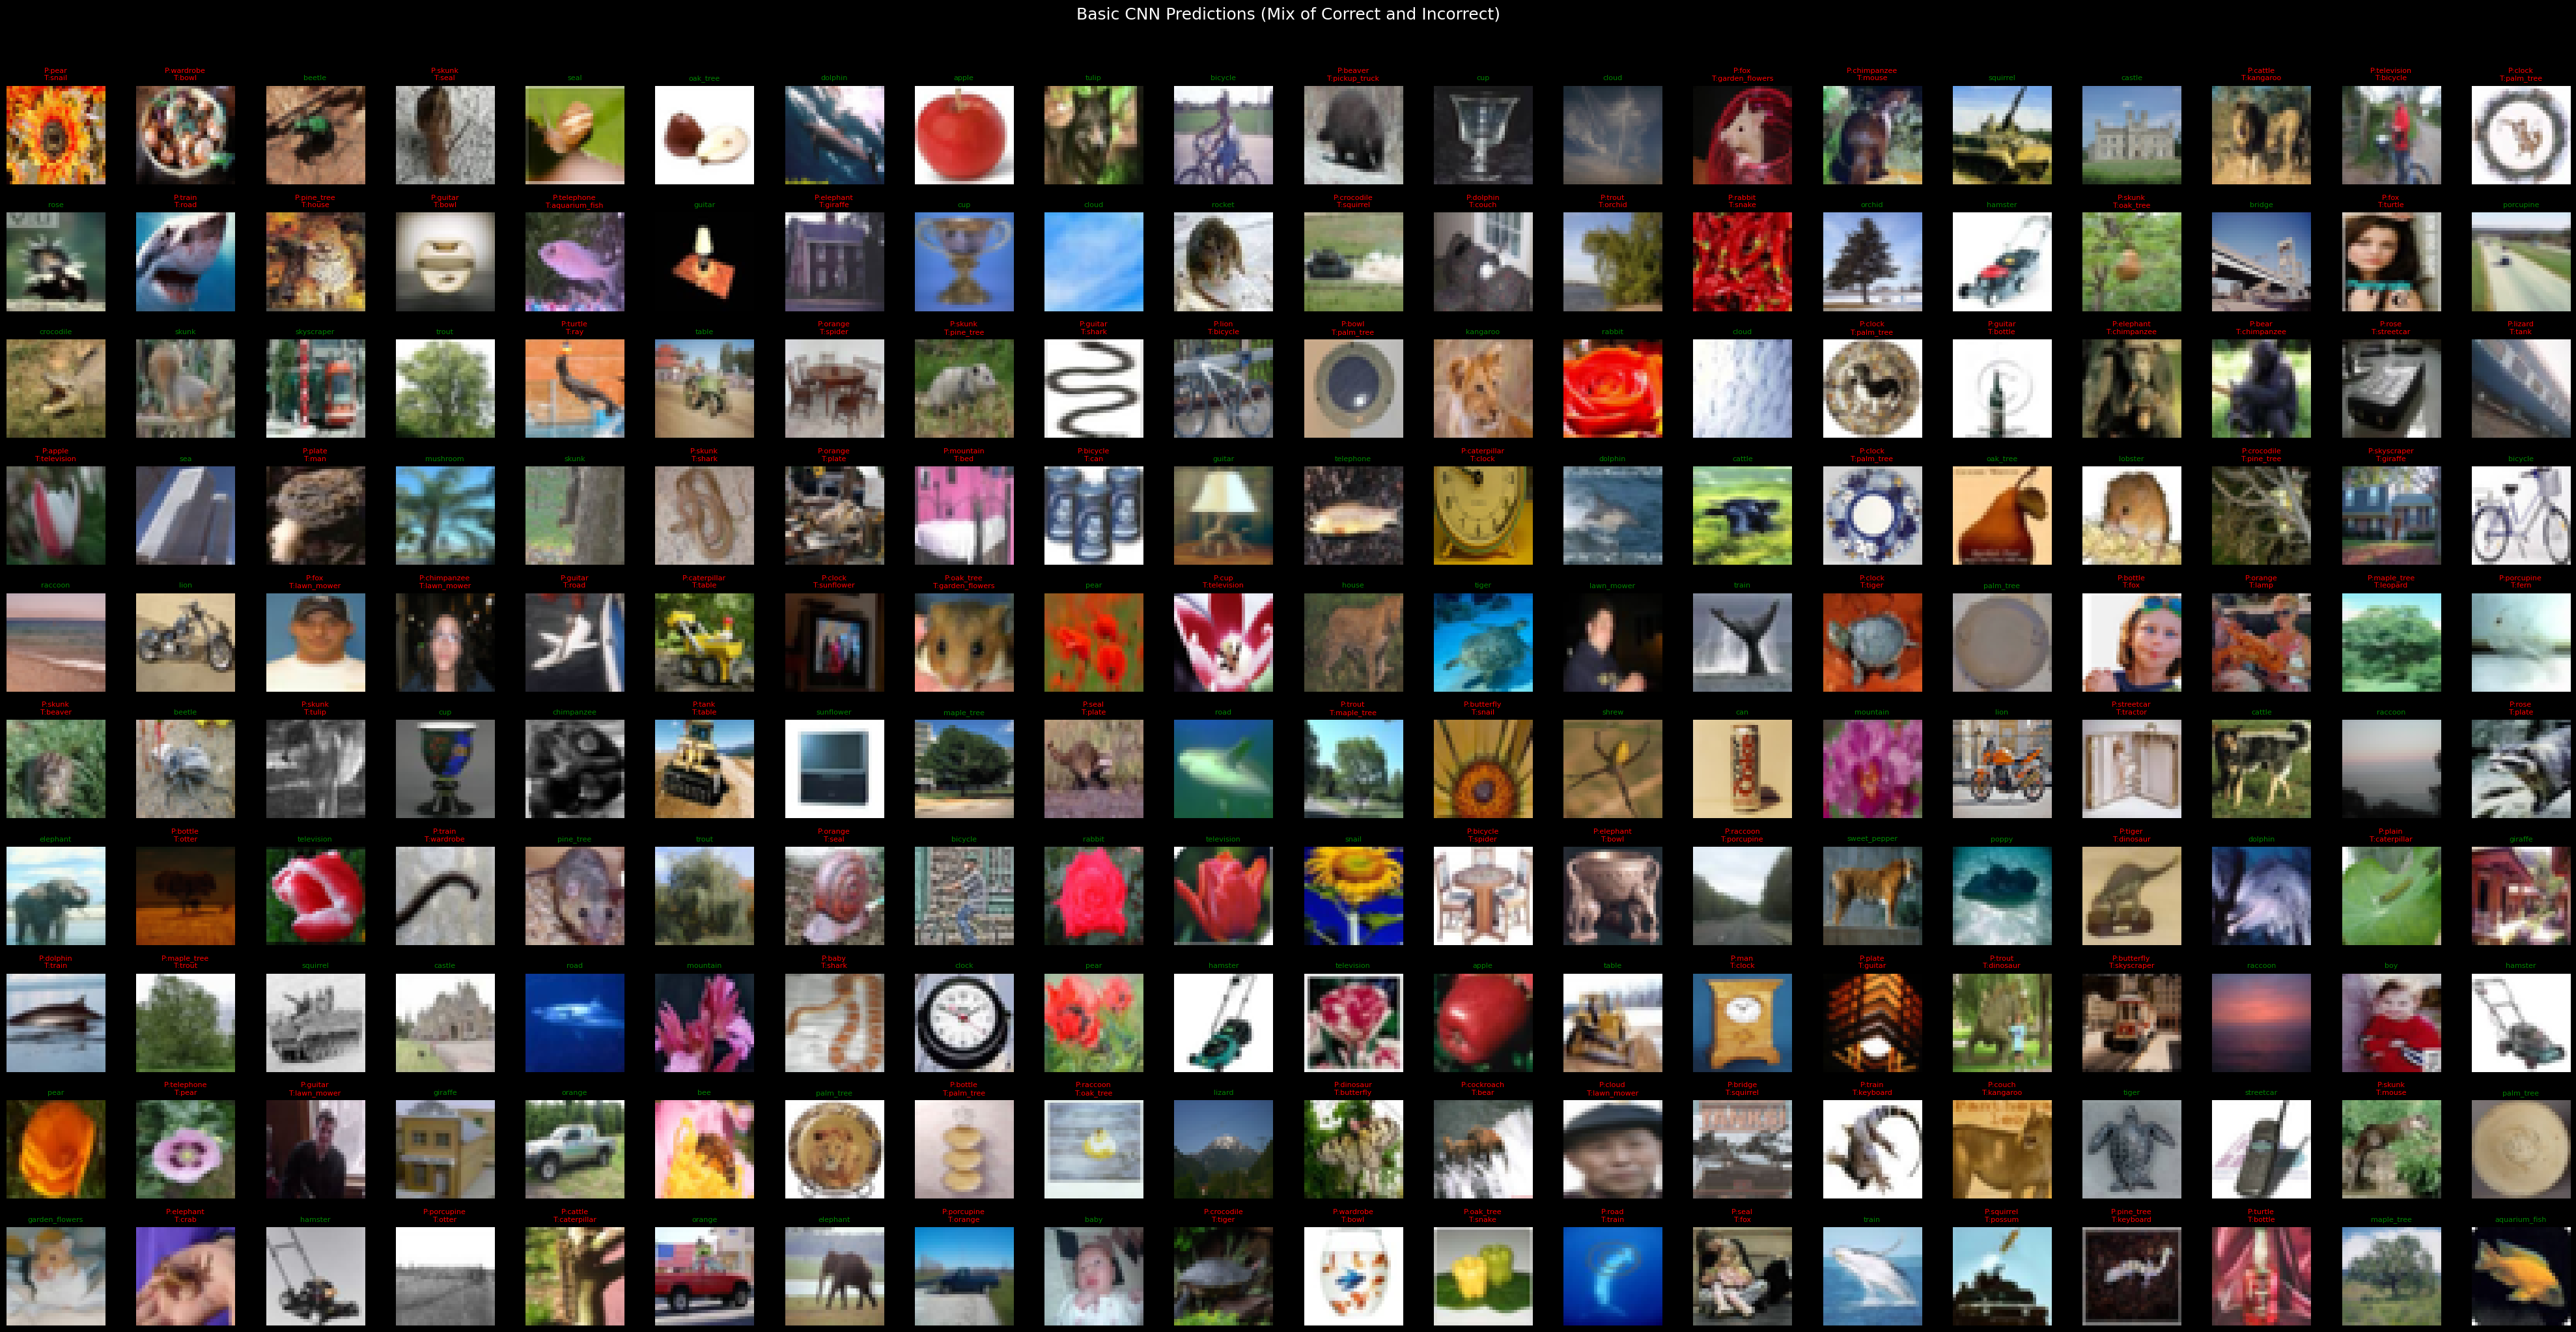

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
ann_predictions = ann_model.predict(test_images)
basic_cnn_predictions = basic_cnn_model.predict(test_images)
deeper_cnn_predictions = deeper_cnn_model.predict(test_images)

# Convert labels
test_labels_int = np.argmax(test_labels_one_hot, axis=1)

ann_predicted_labels = np.argmax(ann_predictions, axis=1)
basic_cnn_predicted_labels = np.argmax(basic_cnn_predictions, axis=1)
deeper_cnn_predicted_labels = np.argmax(deeper_cnn_predictions, axis=1)

# Confusion matrices
cm_ann = confusion_matrix(test_labels_int, ann_predicted_labels)
cm_basic = confusion_matrix(test_labels_int, basic_cnn_predicted_labels)
cm_deeper = confusion_matrix(test_labels_int, deeper_cnn_predicted_labels)

# Plot side by side
# fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues", ax=axes[0])
# axes[0].set_title("ANN Model")
# axes[0].set_xlabel("Predicted")
# axes[0].set_ylabel("Actual")

# sns.heatmap(cm_basic, annot=True, fmt="d", cmap="Blues", ax=axes[1])
# axes[1].set_title("Basic CNN Model")
# axes[1].set_xlabel("Predicted")
# axes[1].set_ylabel("Actual")

# sns.heatmap(cm_deeper, annot=True, fmt="d", cmap="Blues", ax=axes[2])
# axes[2].set_title("Deeper CNN Model")
# axes[2].set_xlabel("Predicted")
# axes[2].set_ylabel("Actual")

# plt.tight_layout()
# plt.show()

# Find correctly and incorrectly classified images
correctly_classified_indices = np.where(basic_cnn_predicted_labels == test_labels_int)[0]
incorrectly_classified_indices = np.where(basic_cnn_predicted_labels != test_labels_int)[0]

# Define class names for CIFAR-100
cifar100_classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
    'dinosaur', 'dolphin', 'elephant', 'fern', 'finch', 'forest', 'fox', 'garden_flowers', 'giraffe',
    'girl', 'grass', 'guitar', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower',
    'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck',
    'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road',
    'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone',
    'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
    'willow_tree', 'wolf', 'woman', 'worm'
]
class_names = cifar100_classes


# Select a mix of correctly and incorrectly classified images
num_correct_to_show = 100
num_incorrect_to_show = 100

# Ensure we don't try to show more images than available
num_correct_to_show = min(num_correct_to_show, len(correctly_classified_indices))
num_incorrect_to_show = min(num_incorrect_to_show, len(incorrectly_classified_indices))

selected_correct_indices = np.random.choice(correctly_classified_indices, num_correct_to_show, replace=False)
selected_incorrect_indices = np.random.choice(incorrectly_classified_indices, num_incorrect_to_show, replace=False)

# Combine and shuffle the indices
all_indices = np.concatenate((selected_correct_indices, selected_incorrect_indices))
np.random.shuffle(all_indices)

# Display images in a 20x10 grid
num_cols = 20
num_rows = 10
num_images_to_show = num_correct_to_show + num_incorrect_to_show

fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))
fig.suptitle("Basic CNN Predictions (Mix of Correct and Incorrect)", fontsize=18, y=1.02)

for i, idx in enumerate(all_indices[:num_images_to_show]):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(test_images[idx]) # Removed reshape and cmap='gray'

    pred = class_names[basic_cnn_predicted_labels[idx]]
    true = class_names[test_labels_int[idx]] # Use test_labels_int for true labels

    if basic_cnn_predicted_labels[idx] == test_labels_int[idx]: # Compare with test_labels_int
        color = "green"
        title = f"{pred}"
    else:
        color = "red"
        title = f"P:{pred}\nT:{true}"

    axes[row, col].set_title(title, fontsize=8, color=color)
    axes[row, col].axis("off")

plt.tight_layout()
plt.show()